# Prerequisite
Before getting start with the IBM Quantum Lab, some basic settings, such as account loadding or the packages import, have to been done.
In the following demostrations, we will focus on real device, which has dissipations, and thus the backend should be chosen from a device that is avalaible with your account.

In [1]:
# load IBM accouunt in order to get the access to real devices
from qiskit import IBMQ
from qiskit.tools.jupyter import * 
# load IBM account if run via LAB
IBMQ.load_account()
# internal account
provider = IBMQ.get_provider(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')
# simulator
from qiskit.providers.aer import QasmSimulator, Aer
simulator = Aer.get_backend('qasm_simulator');
print(simulator.status())

# GHZ state
Suppose we have a system with $N$ qubits, all prepared in zeros initially as
$
| \psi(0) \rangle
=
|00 \cdots \rangle.
$
To create a GHZ state, we apply a Hadamard operation on zero-th qubit, obtaining
$$
| \psi(1) \rangle
=
\dfrac{1}{\sqrt{2}}
\left(
| 00 \cdots 0 \rangle
+
| 10 \cdots 0 \rangle
\right).
$$
After that we apply a sequence of $n-1$ CNOT gate between $n$-th and $(n+1)$-th qubits for $n = 0, 1, \cdots, n-1$.
Thus, the state becomes
$$
| \psi(2) \rangle
=
\dfrac{1}{\sqrt{2}}
\left(
| 00 \cdots 0 \rangle
+
| 11 \cdots 1 \rangle
\right)
\equiv
\dfrac{1}{\sqrt{2}}
\left(
| 0 \rangle ^ {\otimes n}
+
| 1 \rangle ^ {\otimes n}
\right),
$$
which is maximally entangled.

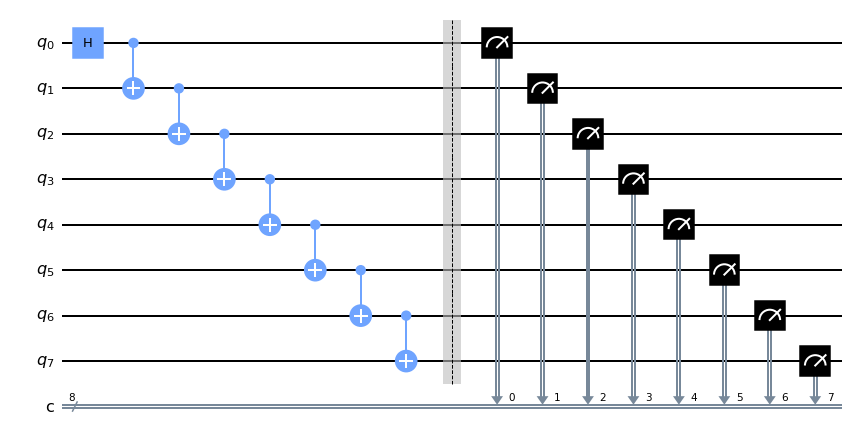

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

N_bit = 8
q = QuantumRegister(N_bit, 'q')
c = ClassicalRegister(N_bit, 'c')
circ = QuantumCircuit(q,c)

# GHZ state
circ.h(0)
for j in range(1, N_bit):
    circ.cx(j-1,j)

# measurements
circ.barrier(range(N_bit))
for j in range(N_bit):
    circ.measure(j,j)

# view circuit diagram
circ.draw()


# Execute the experiment on a simulator

In [3]:
from qiskit import execute
from qiskit.tools.monitor import job_monitor

N_shots = 100
job = execute(circ, simulator, shots=N_shots)
print(f"job id: {job.job_id()}")
job_monitor(job)
result = job.result()
counts = result.get_counts()

# print result
print()
print('[result]')
print("total shots = {})".format(N_shots))
print(counts)

job id: 3ccaca85-2f23-4164-9a7f-2bb855f354a3
Job Status: job has successfully run

[result]
total shots = 100)
{'00000000': 47, '11111111': 53}


### plot counting histogram

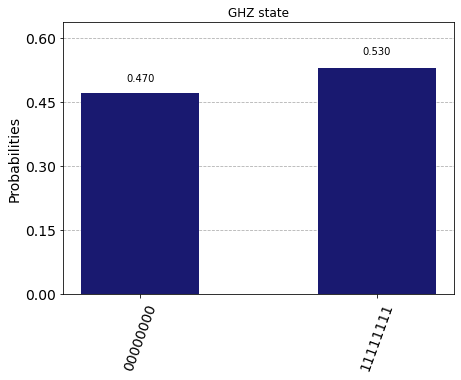

In [4]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, color='midnightblue', title='GHZ state')

## What if we append an inverse gate sequence before the measurement?
Instead of preforming on the simulator, we switch to a selected real quantum processor.

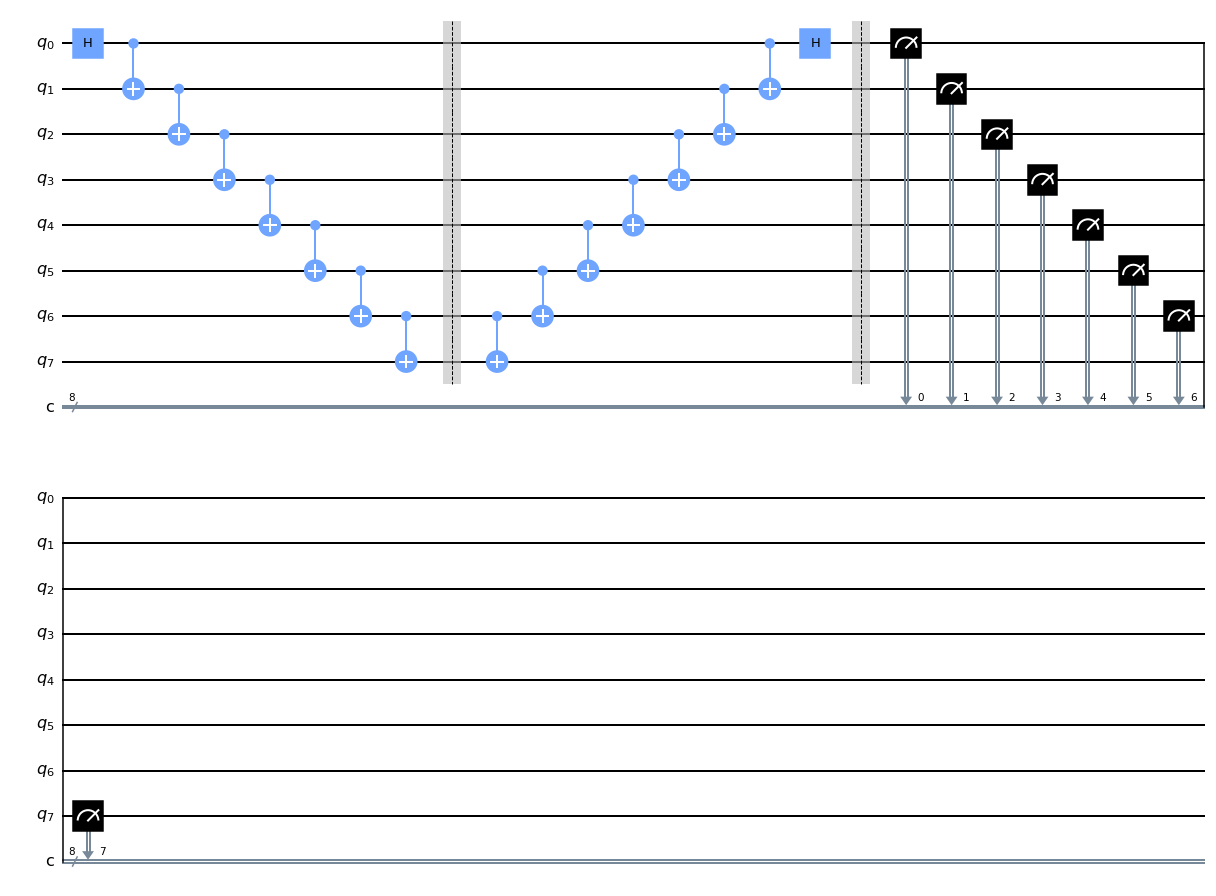

In [36]:
N_bit = 8
q = QuantumRegister(N_bit, 'q')
c = ClassicalRegister(N_bit, 'c')
circ = QuantumCircuit(q,c)

# GHZ state
circ.h(0)
for j in range(1, N_bit):
    circ.cx(j-1,j)

circ.barrier(range(N_bit))

# inverse
for j in range(N_bit-1, 0, -1):
    circ.cx(j-1,j)
circ.h(0)

# measurements
circ.barrier(range(N_bit))
for j in range(N_bit):
    circ.measure(j,j)

# view circuit diagram
circ.draw()

# Perform the experiment on a real device

In [38]:
# real device
backend = provider.get_backend('ibmq_sydney')

N_shots = 100
job = execute(circ, backend, shots=N_shots)
print(f"job id: {job.job_id()}")
job_monitor(job)
result = job.result()
counts = result.get_counts()

# print result
print()
print('[result]')
print("total shots = {})".format(N_shots))
print(counts)

job id: 6135bb24bcace6f3aa6f2227
Job Status: job has successfully run

[result]
total shots = 100)
{'00000000': 15, '00000001': 18, '00010000': 1, '00010001': 2, '00011000': 2, '00011001': 1, '00011100': 1, '00011110': 1, '00000010': 4, '00100000': 2, '00100001': 3, '00100100': 1, '00101011': 1, '00101111': 1, '00000011': 2, '00110000': 1, '00110001': 3, '00110101': 1, '00111000': 1, '00111100': 1, '00111101': 1, '00111111': 1, '00000100': 1, '01000000': 1, '01000001': 1, '01000111': 1, '00000101': 4, '01010000': 1, '01010100': 1, '00000110': 2, '01100000': 2, '01111001': 1, '00001000': 3, '10000000': 1, '10000001': 1, '10000010': 1, '10001010': 1, '10001101': 1, '00001001': 1, '10010011': 1, '10100000': 1, '10100011': 1, '00001011': 1, '10110001': 1, '00001100': 1, '11000001': 1, '11011010': 1, '00001110': 2, '11100000': 1, '11110101': 1}


### plot counting histogram

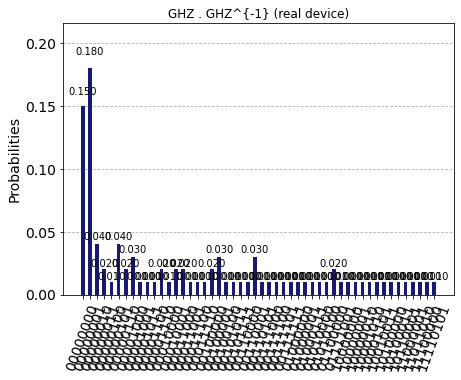

In [42]:
plot_histogram(counts, color='midnightblue', title='GHZ . GHZ^{-1} (real device)')